# Linear Regression
___

Linear regression is a fundamental statistical method used for predictive analysis and modeling relationships between variables. It aims to establish a linear relationship between one or more independent variables and a dependent variable.

#### Mathematical Formulation

The basic form of a simple linear regression model is:

$$ y = \beta_0 + \beta_1x + \epsilon $$

Where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $\beta_0$ is the y-intercept
- $\beta_1$ is the slope
- $\epsilon$ is the error term

For multiple linear regression with more than one independent variable, the equation expands to:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon $$

The goal is to find the best-fit line that minimizes the sum of squared residuals, often using the Ordinary Least Squares (OLS) method.
___
#### Algorithm

Linear regression works by:

1. Collecting data points for the dependent and independent variables
2. Plotting these points on a scatter plot
3. Calculating the best-fit line through these points
4. Using the resulting equation to make predictions

The regression coefficient ($\beta_1$) is calculated using the formula:

$$ \beta_1 = \frac{\sum [(x_i - \bar{x})(y_i - \bar{y})]}{\sum [(x_i - \bar{x})^2]} $$

Where $x_i$ and $y_i$ are observed data points, and $\bar{x}$ and $\bar{y}$ are their respective means.

#### Advantages

1. **Simplicity**: Linear regression is easy to understand, implement, and interpret.
2. **Efficiency**: It has a lower time complexity compared to many other machine learning algorithms.
3. **Performance**: It works well for linearly separable datasets.
4. **Regularization**: Overfitting can be reduced through regularization techniques.

#### Disadvantages

1. **Limited to Linear Relationships**: It assumes a straight-line relationship between variables, which may not always be the case in real-world scenarios.
2. **Sensitivity to Outliers**: Extreme data points can significantly impact the regression line and skew results.
3. **Assumption of Independence**: Linear regression assumes that input variables are independent of each other, which is not always true.
4. **Prone to Underfitting**: For complex, non-linear relationships, linear regression may oversimplify and fail to capture the true nature of the data.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from em_el.linear_model import LinearRegression

In [10]:
# Load and trim dataset
penguins = sns.load_dataset('penguins')
gentoo = penguins[penguins['species'] == 'Gentoo'].dropna()
gentoo = gentoo[['bill_length_mm', 'bill_depth_mm']]
print(gentoo.shape)

(119, 2)


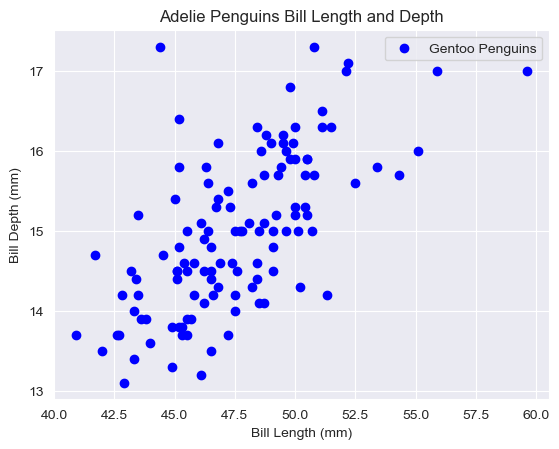

In [11]:
# Data exploration
plt.scatter(gentoo.bill_length_mm, gentoo.bill_depth_mm, color = "blue", label = "Gentoo Penguins")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("Adelie Penguins Bill Length and Depth")
plt.legend()
plt.show()

These features appear roughly linearly correlated

In [12]:
def linear_activation(z):
    return z

In [13]:
X = np.array(gentoo["bill_length_mm"].values).reshape(-1, 1) / max(gentoo['bill_length_mm'])
y = np.array(gentoo["bill_depth_mm"].values).reshape(-1, 1) / max(gentoo['bill_depth_mm'])

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # Split into train-test data

(119, 1)
(119, 1)


In [15]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    
    def __init__(self, activation_function):
        self.activation_function = activation_function
    
    
    def train(self, X, y, alpha = 0.0005, epochs = 5):
        self.w = np.random.rand(X.shape[1]).reshape(-1, 1)
        self.b = np.random.rand()
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, yi in zip(X, y):
                error = (self.predict(xi) - yi)
                self.w -= alpha*error*xi
                self.b -= alpha*error
                errors += alpha*(error**2)
            self.errors_.append(errors/N)
        # return self
    
    
    def predict(self, x):
        preactivation = np.dot(x, self.w) + self.b
        return self.activation_function(preactivation)

In [40]:
node = SingleNeuron(linear_activation)
node.train(X_train, y_train, alpha = 0.001, epochs = 4000)

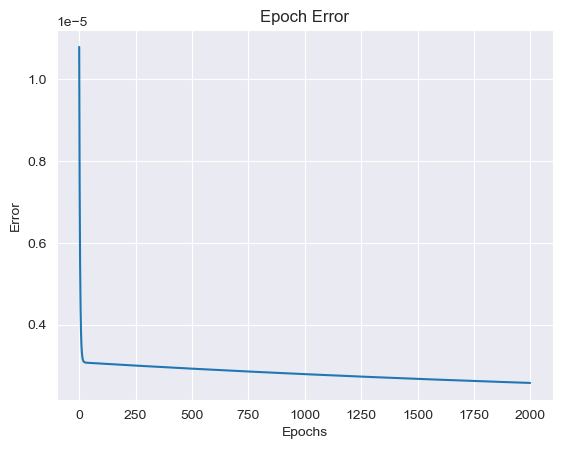

In [38]:
plt.plot(node.errors_)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Epoch Error")
plt.show()

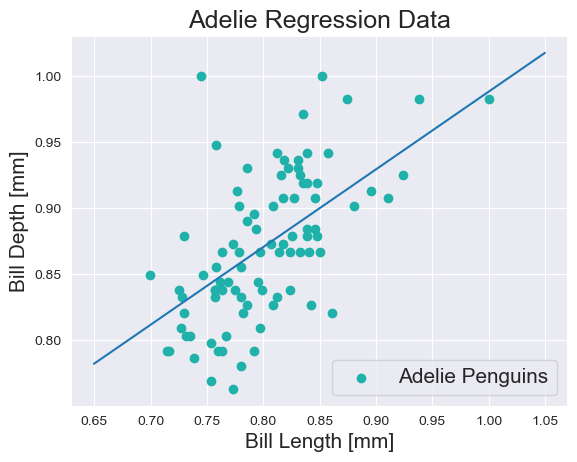

In [42]:
domain = np.linspace(np.min(X_train) - .05, np.max(X_train) + .05, 100)

plt.scatter(X_train, y_train, color = "lightseagreen", label = "Adelie Penguins")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Depth [mm]", fontsize = 15)
plt.title("Adelie Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

#### Error Analysis
___
We use the following metrics to measure the error and effectiveness of the regression model

1. Mean Squared Error (MSE):
The MSE measures the average squared difference between the predicted values and the actual values.

$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

Where $y_i$ are the actual values, $\hat{y}_i$ are the predicted values, and $n$ is the number of observations.

2. Mean Absolute Error (MAE):
The MAE measures the average absolute difference between the predicted values and the actual values.

$$ MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i| $$

3. R-squared (R²):
R² measures the proportion of variance in the dependent variable that is predictable from the independent variable(s).

$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

Where $\bar{y}$ is the mean of the actual values.

These metrics help assess the performance of linear regression models, with MSE and MAE focusing on prediction errors, while R² indicates the goodness of fit.

In [ ]:
y_hat = node.predict(X_test)
MSE = np.mean(np.square(y_hat - y_test))
print(f"MSE = {MSE}")

MAE = np.mean(np.abs(y_hat - y_test))
print(f"MAE = {MAE}")

r2 = r2_score(y_test, y_hat)
print(f"R2 = {r2}")